In [1]:
# 同时计算mua和mus
import os  
import numpy as np
import struct
import matplotlib.pyplot as plt
import gc
import random
import math
from tensorflow import keras
import sklearn
# from scipy.interpolate import CubicSpline
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
import keras_tuner

In [32]:
with open("C:\\Users\\Administrator\\source\\data\\dataset_test.bin", "rb") as file0:
    data1 = file0.read(4)
    NM1 = struct.unpack("i", data1)[0]
    sig2 = np.zeros((NM1,200),dtype = np.float32)
    an2 = np.zeros((NM1,4),dtype = np.float32)
    for i in range(NM1):
        for k in range(4):
            data1 = file0.read(4)
            an2[i,k] = struct.unpack("f", data1)[0]
        for k in range(200):
            data1 = file0.read(4)
            sig2[i,k] = struct.unpack("f", data1)[0]  
    # data1 = file0.read(len('end\0'))
    # end = struct.unpack("4s", data1)[0]  

In [33]:
with open("C:\\Users\\Administrator\\source\\data\\dataset.bin", "rb") as file0:
    data1 = file0.read(4)
    NM1 = struct.unpack("i", data1)[0]
    sig1 = np.zeros((NM1,200),dtype = np.float32)
    an1 = np.zeros((NM1,4),dtype = np.float32)
    for i in range(NM1):
        for k in range(4):
            data1 = file0.read(4)
            an1[i,k] = struct.unpack("f", data1)[0]
        for k in range(200):
            data1 = file0.read(4)
            sig1[i,k] = struct.unpack("f", data1)[0]  
    # data1 = file0.read(len('end\0'))
    # end = struct.unpack("4s", data1)[0]  

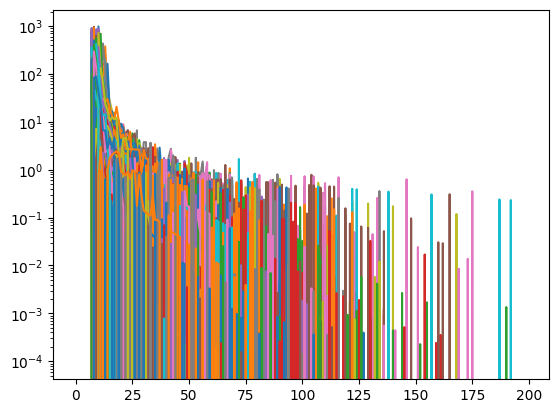

1262
[1.24224685e-02 9.14926987e+01 1.54261023e+03 8.50000024e-01]


In [4]:
plt.axes(yscale = "log") 
for n in range(sig1.shape[0]):
    plt.plot(sig1[n])
plt.show()
print(NM1)
print(an2[-1])

In [ ]:

# def labeling(y,N):
#     ##############
#     a,b = y.shape
#     min0 = np.min(y,0)
#     max0 = np.max(y,0)
#     step = (max0-min0)/N
#     y2 = np.zeros((a,b,N))
    
#     # kernel = np.array([1]) 
#     # kernel = kernel/np.sum(kernel)
    
#     for i in range(a):
#         for j in range(b):
#             if(step[j]!=0):
#                 idx = (y[i,j]-min0[j])/step[j]-1
#                 y2[i,j,int(idx)] = 1
#             else:
#                 y2[i,j,0] = 1
#             # y2[i,j] = np.convolve(y2[i,j],kernel,mode='same')
            
#     return y2    
  

In [ ]:
xsig = sig1[0]
peaks, _ = find_peaks(xsig, height=0)
plt.plot(xsig)
plt.plot(peaks, xsig[peaks], "x")
plt.plot(np.zeros_like(xsig), "--", color="gray")
plt.show()

x = np.zeros((peaks.shape[0]+2,))
y = np.zeros((peaks.shape[0]+2,))
x[1:-1] = peaks
y[1:-1] = xsig[peaks]
x[-1] = sig1.shape[1]
plt.plot(x,y)
plt.show()

f2 = interp1d(x, y, kind='linear')
N = 200
xnew = np.linspace(0, N,num=N)
ynew = f2(xnew)

# plt.axes(yscale = "log") 
plt.plot(ynew)
plt.show()

In [34]:
def smooth_peak(xsig):
    peaks, _ = find_peaks(xsig, height=0)
    # plt.plot(xsig)
    # plt.plot(peaks, xsig[peaks], "x")
    # plt.plot(np.zeros_like(xsig), "--", color="gray")
    # plt.show()
    if(peaks.shape[0]!=0):
        x = np.zeros((peaks.shape[0]+3,))
        y = np.zeros((peaks.shape[0]+3,))
        x[1:-2] = peaks
        y[1:-2] = xsig[peaks]
        x[-1] = sig1.shape[1]
        y[-1] = 0
        x[-2] = peaks[-1]+5
        y[-2] = 0
        # plt.plot(x,y)
        # plt.show()

        f2 = interp1d(x, y, kind='linear')
        N = xsig.shape[0]
        xnew = np.linspace(0, N,num=N)
        ynew = f2(xnew)
    
    else:
        ynew = np.zeros((xsig.shape[0],))
    
    return ynew
#     # plt.axes(yscale = "log") 
#     plt.plot(ynew)
#     plt.show()
    

In [35]:
msig1 = np.zeros((sig1.shape[0],sig1.shape[1]))
an3 = np.zeros((an1.shape))
i_invalid = 0
flag = 0
for i in range(sig1.shape[0]):
    ynew = smooth_peak(sig1[i])
    if(np.all(ynew == 0)):
        i_invalid = i_invalid+1
    else:
        msig1[flag] = ynew
        an3[flag] = an1[i]
        flag = flag+1
msig1 = msig1[0:msig1.shape[0]-i_invalid,:]  
an3 = an3[0:an3.shape[0]-i_invalid,:]

i_invalid = 0
flag = 0
msig2 = np.zeros((sig2.shape[0],sig2.shape[1]))
an4 = np.zeros((an2.shape))
for i in range(sig2.shape[0]):
    ynew = smooth_peak(sig2[i])
    if(np.all(ynew == 0)):
        i_invalid = i_invalid+1
    
    else:
        msig2[flag] = ynew
        an4[flag] = an2[i]
        flag = flag+1
msig2 = msig2[0:msig2.shape[0]-i_invalid,:] 
an4 = an4[0:an4.shape[0]-i_invalid,:]

# msig1 = np.zeros((sig1.shape[0],sig1.shape[1]))
# for i in range(sig1.shape[0]):
#     msig1[i] = smooth_peak(sig1[i])
    
# msig2 = np.zeros((sig2.shape[0],sig2.shape[1]))
# for i in range(sig2.shape[0]):
#     msig2[i] = smooth_peak(sig2[i])

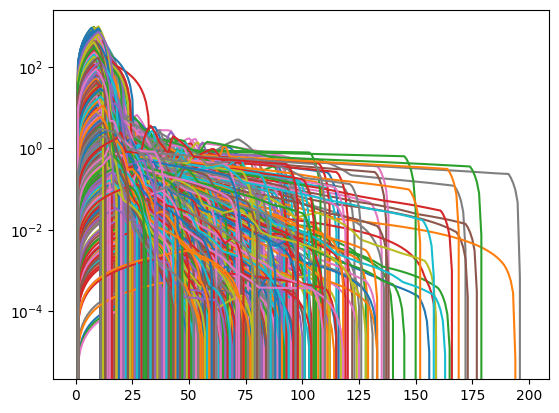

In [104]:
plt.axes(yscale = "log") 
for n in range(msig1.shape[0]):
    plt.plot(msig1[n])
plt.show()

In [36]:

x_train = msig1
y_train = an3
x_test = msig2
y_test = an4

x_train = (np.log10((x_train+1e-6)/1000)+9)/9
x_test = (np.log10((x_test+1e-6)/1000)+9)/9
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
d_train = np.reshape(y_train[:,0],(y_train[:,0].shape[0],1,1)) # add thickness of sample into input data
d_test = np.reshape(y_test[:,0],(y_test[:,0].shape[0],1,1))

x_train = np.concatenate((d_train,x_train),axis = 1) 
x_test = np.concatenate((d_test,x_test),axis = 1)
y_train[:,1] = y_train[:,1]/1e2
y_test[:,1] = y_test[:,1]/1e2
y_train[:,2] = y_train[:,2]/200e2
y_test[:,2] = y_test[:,2]/200e2
y_train = y_train[:,1:3]
y_test = y_test[:,1:3]
# y_train = labeling(y_train,num_labels)[:,1,:] # select to predict what : 0:thickness 1:mua 2: mus
# y_test = labeling(y_test,num_labels)[:,1,:]
print('x_train.shape = '+str(x_train.shape)) 
print('y_train.shape = '+str(y_train.shape)) 

x_train.shape = (1258, 201, 1)
y_train.shape = (1258, 2)


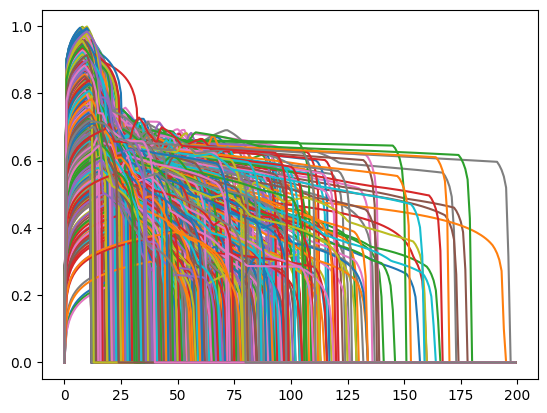

In [106]:
for n in range(x_train.shape[0]):
    plt.plot(x_train[n,1:])
plt.show()


In [9]:
# num_classes = y_train.shape[1]
########################################
# input_shape = (1,5,1)
# x = np.arange(np.prod(input_shape)).reshape(input_shape)      # test cropping#
# print(x)
# y = keras.layers.Cropping1D(cropping=(0,4))(x)
# z = keras.layers.Cropping1D(cropping=(1,0))(x)
# print(y)
# print(z)

In [37]:
#####################################################
index = [i for i in range(x_train.shape[0])]  
np.random.shuffle(index) 
x_train = x_train[index]
y_train = y_train[index]

# x_train = np.split(x_train, [int(x_train.shape[0]*0.6), x_train.shape[0]])[0]
# x_val = np.split(x_train, [int(x_train.shape[0]*0.6), x_train.shape[0]])[1]
# y_train = np.split(y_train, [int(y_train.shape[0]*0.6), y_train.shape[0]])[0]
# y_val = np.split(y_train, [int(y_train.shape[0]*0.6), y_train.shape[0]])[1]
####################################################

In [38]:
class MyHyperModel(keras_tuner.HyperModel) :
    
    # def __int__(self, input_shape):
    #     self.input_shape = input_shape
        
    def build(self, hp) :  
        input_layer = keras.layers.Input((201,1))

        d_1 = keras.layers.Cropping1D(cropping=(0,200))(input_layer)
        sig = keras.layers.Cropping1D(cropping=(1,0))(input_layer)

        d_1 = keras.layers.Reshape((1,))(d_1)
        conv1 = keras.layers.Reshape((200,1))(sig)
        
        for i in range( hp.Int("num_conv", min_value=1, max_value=3, step=1)) :
            conv1 = keras.layers.Conv1D(filters=hp.Int(name=f"filters_{i}", min_value=8, max_value=64, step=15), 
            kernel_size=hp.Int(name=f"kernel_{i}", min_value=3, max_value=7, step=2), 
                                        padding="same",
                                       activation=hp.Choice(f"conv_act_{i}", ["relu","leaky_relu", "sigmoid"] ))(conv1)
            # Batch Norm and Dropout layers as hyperparameters to be searched 
            if hp.Boolean("batch_norm"): 
                conv1 = keras.layers.BatchNormalization()(conv1) 
            if hp.Boolean("dropout"): 
                conv1 = keras.layers.Dropout(0.5)(conv1)

       

        gap = keras.layers.GlobalAveragePooling1D()(conv1)

        for i in range(hp.Int("num_dense_gap", min_value=1, max_value=8, step=1)):
            gap = keras.layers.Dense(hp.Int(name=f"dense_gap_{i}", min_value=4, max_value=64, step=2)
                                    ,activation=hp.Choice("mlp_activ_gap", ['sigmoid', 'relu']))(gap)
            if hp.Boolean("batch_norm"): 
                gap = keras.layers.BatchNormalization()(gap) 
            if hp.Boolean("dropout"): 
                gap = keras.layers.Dropout(0.5)(gap)
            


        for i in range(hp.Int("num_dense_d1", min_value=1, max_value=8, step=1)):
            d_1 = keras.layers.Dense(hp.Int(name=f"dense_d1_{i}", min_value=4, max_value=64, step=2)
                                    ,activation=hp.Choice("mlp_activ_d1", ['sigmoid', 'relu']))(d_1)
            if hp.Boolean("batch_norm"): 
                d_1 = keras.layers.BatchNormalization()(d_1) 
            if hp.Boolean("dropout"): 
                d_1 = keras.layers.Dropout(0.5)(d_1)
                
        # d_1 = keras.layers.Reshape((d_1.shape[0],))(d_1)



        merged = keras.layers.Concatenate()([d_1, gap])
        
        for i in range(hp.Int("num_dense_o", min_value=1, max_value=8, step=1)):
            merged = keras.layers.Dense(hp.Int(name=f"dense_o_{i}", min_value=2, max_value=64, step=2)
                                    ,activation=hp.Choice("mlp_activ_o", ['sigmoid', 'relu']))(merged)
            if hp.Boolean("batch_norm"): 
                merged= keras.layers.BatchNormalization()(merged) 
            if hp.Boolean("dropout"): 
                merged = keras.layers.Dropout(0.5)(merged)
                
        # merged = keras.layers.Dense(8, activation='relu')(merged)

        output_layer = keras.layers.Dense(2, activation="linear")(merged)
        
        model = keras.models.Model(inputs=input_layer, outputs=output_layer)
        
        model.compile(
                optimizer="adam",
                # loss="mean_squared_error",
                loss="mean_squared_error",
                metrics=["MeanAbsoluteError"],
            )
        
        return model
    
    def fit(self, hp, model,x, *args, **kwargs) : 
 
        return model.fit( x,  
                         *args, 
                         shuffle=hp.Boolean("shuffle"), 
                         **kwargs)
# hp = keras_tuner.HyperParameters()
# model = MyHyperModel().build(hp,)
# keras.utils.plot_model(model, show_shapes=True)


In [39]:
hp = keras_tuner.HyperParameters() 
hypermodel = MyHyperModel() 
model = hypermodel.build(hp) 
hypermodel.fit(hp,model,x_train,y_train)

40/40 [==============================] - 1s 6ms/step - loss: 0.3945 - mean_absolute_error: 0.5556


In [43]:
tuner = keras_tuner.BayesianOptimization( 
                        hypermodel=MyHyperModel(), 
                        objective = "val_loss", 
                        max_trials =5, #max candidates to test 
                        overwrite=True, 
                        directory='BO_search_dir', 
                        project_name='sign_language_cnn')

In [42]:
tuner = keras_tuner.Hyperband(hypermodel=MyHyperModel(),
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

In [44]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

Trial 5 Complete [00h 00m 19s]
val_loss: 0.09156802296638489

Best val_loss So Far: 0.028912100940942764
Total elapsed time: 00h 05m 28s
INFO:tensorflow:Oracle triggered exit


In [20]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [115]:
tuner.search(x_train, y_train,epochs=5, 
             validation_data = (x_val,y_val))

Trial 5 Complete [00h 00m 06s]
val_loss: 0.3138510286808014

Best val_loss So Far: 0.2357691526412964
Total elapsed time: 00h 04m 44s
INFO:tensorflow:Oracle triggered exit


In [45]:
tuner.results_summary(1)

Results summary
Results in BO_search_dir\sign_language_cnn
Showing 1 best trials
Trial summary
Hyperparameters:
num_conv: 3
filters_0: 53
kernel_0: 7
conv_act_0: relu
batch_norm: True
dropout: False
num_dense_gap: 1
dense_gap_0: 64
mlp_activ_gap: sigmoid
num_dense_d1: 1
dense_d1_0: 6
mlp_activ_d1: sigmoid
num_dense_o: 8
dense_o_0: 64
mlp_activ_o: sigmoid
filters_1: 53
kernel_1: 7
conv_act_1: sigmoid
dense_gap_1: 32
dense_gap_2: 4
dense_gap_3: 64
dense_d1_1: 24
dense_d1_2: 54
dense_d1_3: 52
dense_o_1: 64
dense_o_2: 26
dense_o_3: 52
dense_o_4: 2
shuffle: False
filters_2: 8
kernel_2: 3
conv_act_2: relu
dense_o_5: 6
dense_o_6: 2
dense_o_7: 2
Score: 0.028912100940942764


In [46]:
best_hps = tuner.get_best_hyperparameters(1) 
h_model = MyHyperModel() 
model = h_model.build(best_hps[0])
model.save('hp_model01.h5')

In [47]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 201, 1)]     0                                            
__________________________________________________________________________________________________
cropping1d_3 (Cropping1D)       (None, 200, 1)       0           input_2[0][0]                    
__________________________________________________________________________________________________
reshape_3 (Reshape)             (None, 200, 1)       0           cropping1d_3[0][0]               
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 200, 53)      424         reshape_3[0][0]                  
____________________________________________________________________________________________

In [48]:
epochs = 500
batch_size = 32
#####################################################
index = [i for i in range(x_train.shape[0])]  
np.random.shuffle(index) 
x_train = x_train[index]
y_train = y_train[index]
####################################################
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model3.2.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    # loss="mean_squared_error",
    loss="mean_absolute_error",
    metrics=["MeanAbsoluteError"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.4,
    verbose=1,
)

Epoch 1/500
24/24 [==============================] - 4s 80ms/step - loss: 0.7891 - mean_absolute_error: 0.7891 - val_loss: 0.4466 - val_mean_absolute_error: 0.4466
Epoch 2/500
24/24 [==============================] - 1s 29ms/step - loss: 0.5010 - mean_absolute_error: 0.5010 - val_loss: 0.4096 - val_mean_absolute_error: 0.4096
Epoch 3/500
24/24 [==============================] - 1s 27ms/step - loss: 0.4088 - mean_absolute_error: 0.4088 - val_loss: 0.3949 - val_mean_absolute_error: 0.3949
Epoch 4/500
24/24 [==============================] - 1s 28ms/step - loss: 0.3499 - mean_absolute_error: 0.3499 - val_loss: 0.3782 - val_mean_absolute_error: 0.3782
Epoch 5/500
24/24 [==============================] - 1s 28ms/step - loss: 0.3024 - mean_absolute_error: 0.3024 - val_loss: 0.3621 - val_mean_absolute_error: 0.3621
Epoch 6/500
24/24 [==============================] - 1s 29ms/step - loss: 0.2718 - mean_absolute_error: 0.2718 - val_loss: 0.3434 - val_mean_absolute_error: 0.3434
Epoch 7/500
24/2

In [49]:
model = keras.models.load_model("best_model3.2.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test error", test_acc)
print("Test loss", test_loss)

1/1 [==============================] - 1s 723ms/step - loss: 0.1025 - mean_absolute_error: 0.1025
Test error 0.10247974842786789
Test loss 0.10247974842786789


In [50]:
mua = np.zeros((x_train.shape[0],))
mus = np.zeros((x_train.shape[0],))
d = np.zeros((x_train.shape[0],))
miu = np.zeros((x_train.shape[0],2))

miu = model.predict(x_train)
mua = miu[:,0]
mus = miu[:,1]
d = x_train[:,0,0]

In [51]:
err = np.zeros((x_train.shape[0],2))

err[:,0] = y_train[:,0]-mua
err[:,1] = y_train[:,1]-mus
# print(mua[k],mus[k],d[k])
# print(y_train[k])

In [52]:
k=np.random.randint(0,x_train.shape[0],1)[0]
print(mua[k],mus[k],d[k])
print(y_train[k])

0.049492016 0.28614867 0.005250438582152128
[0.06007335 0.2877874 ]


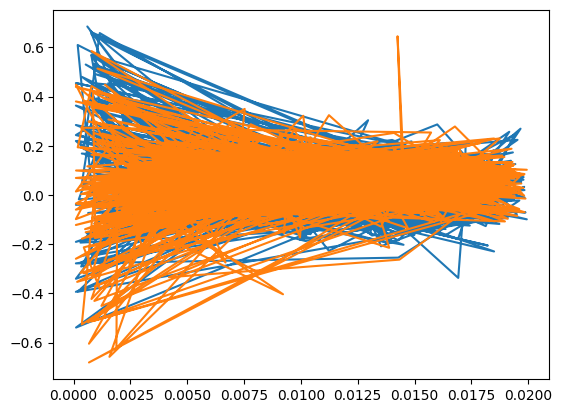

In [53]:
plt.plot(d,err[:,1])
plt.plot(d,err[:,0])
plt.show()

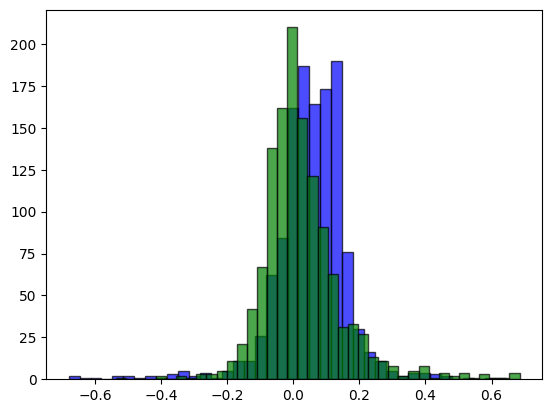

In [54]:
# print(mua,mus,d)
# print(an2[i,1],an2[i,2],an2[i,0])
# plt.plot(abs(an1[:,1]-mua))
# plt.plot(abs(an1[:,2]-mus))
plt.hist(y_train[:,0]-mua, bins=40,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.hist(y_train[:,1]-mus, bins=40,  facecolor="green", edgecolor="black", alpha=0.7)
plt.show()

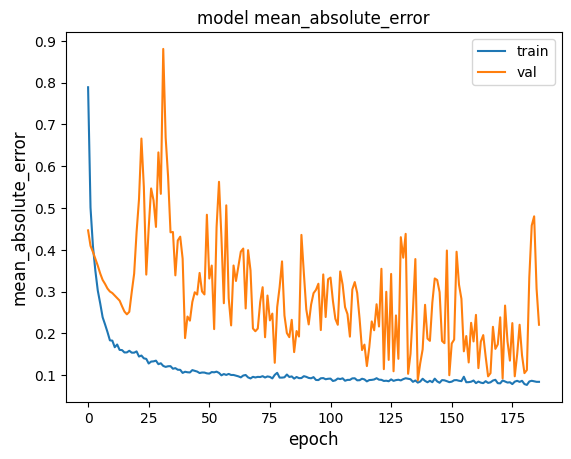

In [55]:
metric = "mean_absolute_error"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [ ]:
# 你可以用pca或者一些降维方法把特征搞一下